In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 1. Read in Data

In [47]:
filepath = "EEG_data.csv"
df = pd.read_csv(filepath)
df

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


# 2. Data Visualization

### 2.1 Predefined Label vs User-defined Label

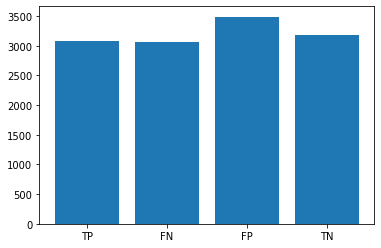

In [48]:
# 1.0 as label, 1.0 as user-defined
TP = df.loc[(df["predefinedlabel"]==1.0) & (df["user-definedlabeln"]==1.0)].shape[0]
# 1.0 as label, 0.0 as user-defined
FN = df.loc[(df["predefinedlabel"]==1.0) & (df["user-definedlabeln"]==0.0)].shape[0]
# 0.0 as label, 1.0 as user-defined
FP = df.loc[(df["predefinedlabel"]==0.0) & (df["user-definedlabeln"]==1.0)].shape[0]
# 0.0 as label, 0.0 as user-defined
TN = df.loc[(df["predefinedlabel"]==0.0) & (df["user-definedlabeln"]==0.0)].shape[0]

X = ["TP", "FN", "FP", "TN"]
Y = [TP, FN, FP, TN]
plt.bar(X, Y, label=Y)
plt.show()

### 2.2 Waves vs Videos

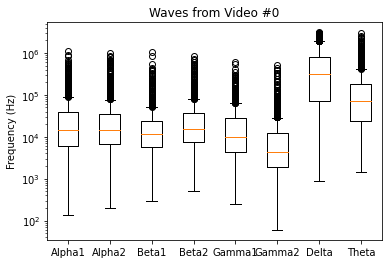

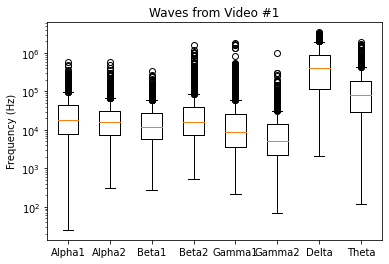

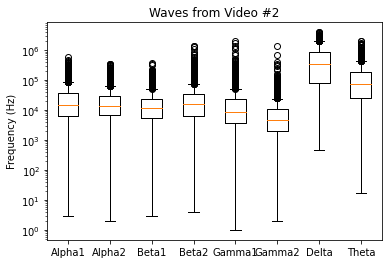

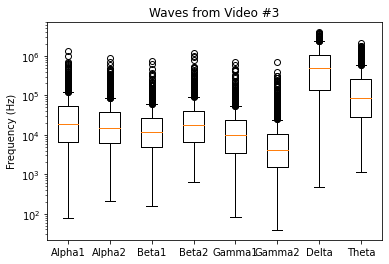

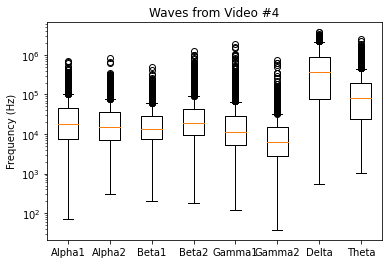

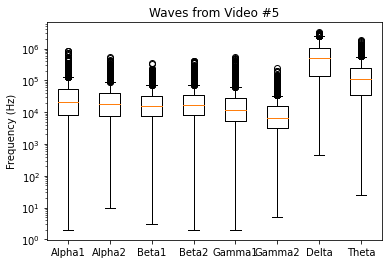

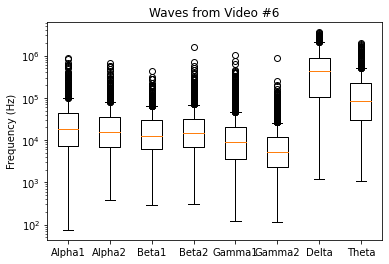

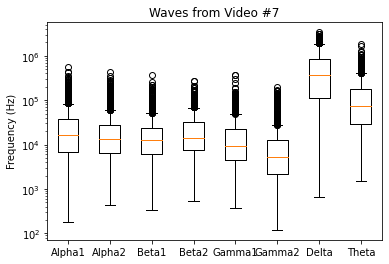

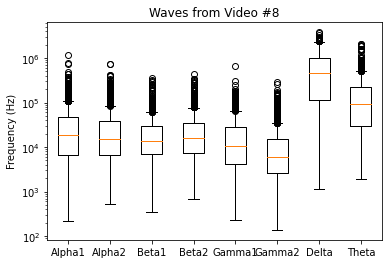

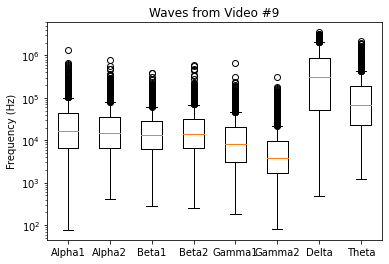

In [49]:
def plotWaveFromVideo(videoI):
    m = df.loc[df["VideoID"]==videoI]
    dataDict = {
        "Alpha1": m["Alpha1"],
        "Alpha2": m["Alpha2"],
        "Beta1": m["Beta1"],
        "Beta2": m["Beta2"],
        "Gamma1": m["Gamma1"],
        "Gamma2": m["Gamma2"],
        "Delta": m["Delta"],
        "Theta": m["Theta"],
    }

    fig, ax = plt.subplots()
    ax.boxplot(dataDict.values())
    ax.set_xticklabels(dataDict.keys())

    plt.title(f"Waves from Video #{i}")
    plt.ylabel("Frequency (Hz)")
    plt.yscale("log")
    plt.show()


for i in range(10):
    plotWaveFromVideo(i)

### 2.3 Attention / Mediation Level vs Waves

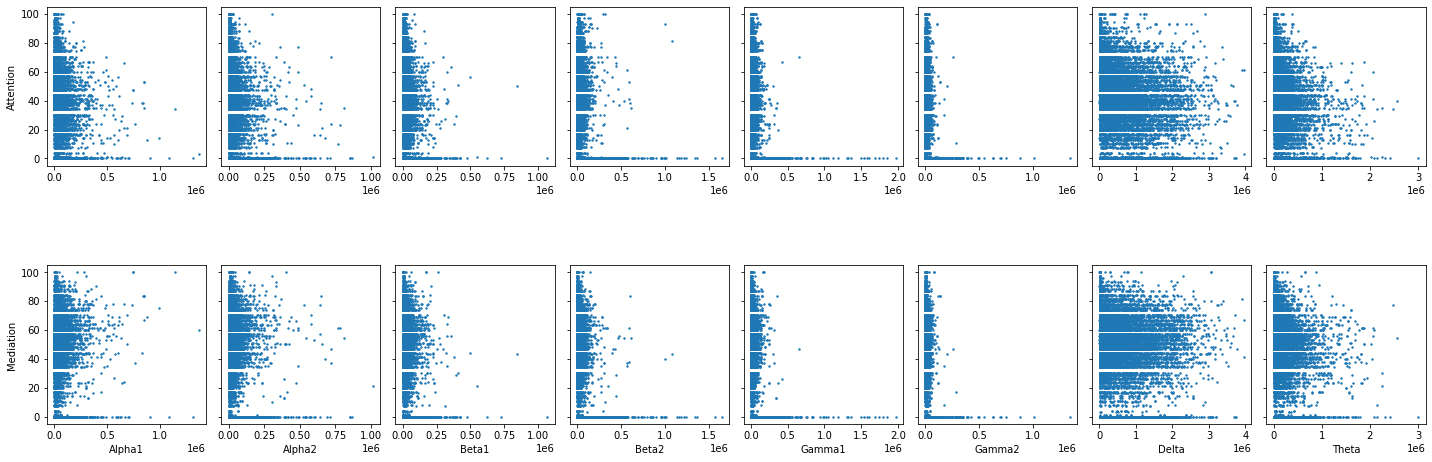

In [84]:
fig, axs = plt.subplots(2, 8, sharey=True)
fig.set_size_inches(20, 8)

X = ["Alpha1", "Alpha2", "Beta1", "Beta2", "Gamma1", "Gamma2", "Delta", "Theta"]
Y = ["Attention", "Mediation"]

for i in range(2):
    for j in range(8):
        axs[i, j].scatter(df[X[j]], df[Y[i]], s=2)
        axs[i, j].set_box_aspect(1)
        if i == 1:
            axs[i, j].set_xlabel(X[j])
        if j == 0:
            axs[i, j].set_ylabel(Y[i])

plt.tight_layout()
plt.show()